## Ridge Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes,make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.metrics import r2_score

### For 2D data

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=2)

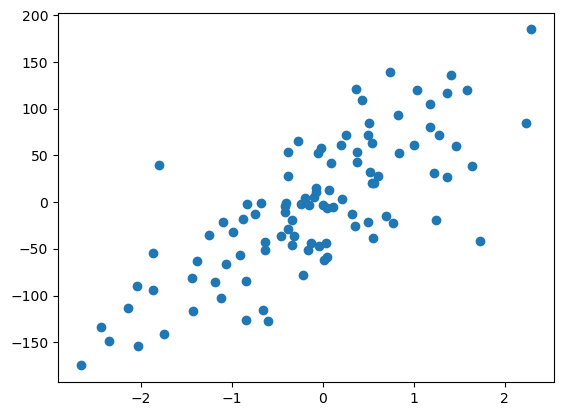

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred_lr = lr.predict(X_test)

In [8]:
r2_score(y_test,y_pred_lr)

0.4185279459850998

In [9]:
rd = Ridge(alpha=20,solver='cholesky')

In [10]:
rd.fit(X_train,y_train)

Ridge(alpha=20, solver='cholesky')

In [11]:
y_pred_rd = rd.predict(X_test)

In [12]:
r2_score(y_test,y_pred_rd)

0.45368569325400676

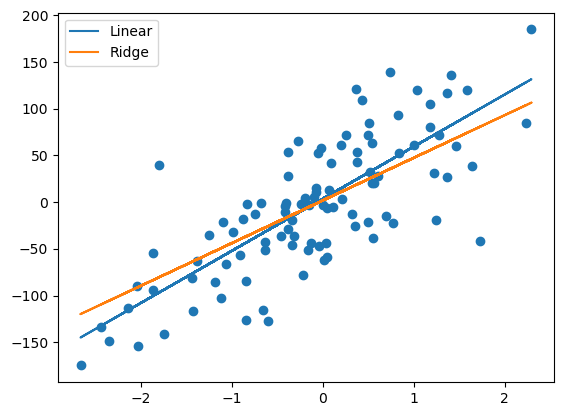

In [13]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='Linear') # Linear Regression
plt.plot(X,rd.predict(X),label='Ridge') # Ridge Regression
plt.legend()
plt.show()

### For nD data

In [14]:
X1,y1 = load_diabetes(return_X_y=True)

In [15]:
# first solve with linear regression

In [16]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [17]:
lr1 = LinearRegression()

In [18]:
lr1.fit(X1_train,y1_train)

LinearRegression()

In [19]:
lr1.intercept_,lr1.coef_

(151.34560453985995,
 array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
        -931.48884588,  518.06227698,  163.41998299,  275.31790158,
         736.1988589 ,   48.67065743]))

In [20]:
y_pred_lr1 = lr1.predict(X1_test)

In [21]:
r2_score(y1_test,y_pred_lr1)

0.4526027629719195

In [22]:
# now solve with ridge regression

In [23]:
rd1 = Ridge(alpha=0.1,solver='cholesky')

In [24]:
rd1.fit(X1_train,y1_train)

Ridge(alpha=0.1, solver='cholesky')

In [25]:
rd1.intercept_,rd1.coef_

(151.4585745667961,
 array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
        -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
         392.28931896,   79.9081772 ]))

In [26]:
y_pred_rd1 = rd1.predict(X1_test)

In [27]:
r2_score(y1_test,y_pred_rd1)

0.46085219464119254

### Using Gradient Descent

In [28]:
sgd = SGDRegressor(penalty='l2',alpha=0.0001,max_iter=500,learning_rate='constant',eta0=0.01)

In [29]:
sgd.fit(X1_train,y1_train)

SGDRegressor(learning_rate='constant', max_iter=500)

In [30]:
y_pred_sgd = sgd.predict(X1_test)

In [31]:
r2_score(y1_test,y_pred_sgd)

0.45222081056483265

In [32]:
# Gradient Descent Using Ridge()

In [33]:
rd2 = Ridge(alpha=0.01,max_iter=500,solver='sparse_cg') # gredient solver = 'sparse_cg’, ‘sag’, ‘saga’,

In [34]:
rd2.fit(X1_train,y1_train)

Ridge(alpha=0.01, max_iter=500, solver='sparse_cg')

In [35]:
y_pred_rd2 = rd2.predict(X1_test)

In [36]:
r2_score(y1_test,y_pred_rd2)

0.4559819503955518